In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Adding the dependencies

There are a lot of different pacages out there, but I have to give full credit to the creators of all these packages. The true heros of this analysis has to be pandas, numpy, sklearn, and matplotlib

In [20]:
educationdata1 = pd.read_csv("filepath")

In [21]:
educationdata1.head()

,ID,final_result,Female,Male,CGPA100,CGPA200,CGPA300
0,1,2,1,0,288,348,262
1,2,2,1,0,325,426,337
2,3,2,0,1,178,198,149
3,4,1,0,1,267,244,2
4,5,3,1,0,361,369,363


In [24]:
summary = educationdata1.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
ID,3029.0,1515.000000,874.541308,1.0,758.0,1515.0,2272.0,3029.0
final_result,3029.0,2.252889,0.623274,1.0,2.0,2.0,3.0,3.0
Female,3029.0,0.360185,0.480133,0.0,0.0,0.0,1.0,1.0
Male,3029.0,0.639815,0.480133,0.0,0.0,1.0,1.0,1.0
CGPA100,3029.0,323.425883,126.776320,2.0,289.0,355.0,409.0,496.0
CGPA200,3029.0,294.755365,122.950054,2.0,244.0,318.0,379.0,498.0
CGPA300,3029.0,310.887752,124.505632,2.0,252.0,339.0,404.0,498.0


(Text(0.5, 1.0, 'Student outcomes'),
 Text(0.5, 0, 'Outcome'),
 Text(0, 0.5, 'Number of students'))

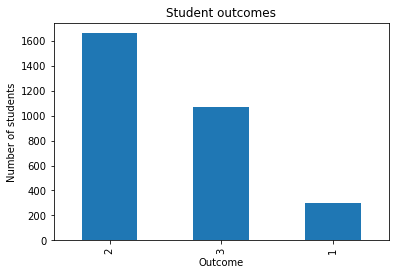

In [26]:
count = educationdata1.final_result.value_counts()
count
count.plot.bar()
plt.title('Student outcomes'),plt.xlabel('Outcome'),plt.ylabel('Number of students')

In [28]:
educationdata1.drop(educationdata1.columns[[-1, 0]], axis=1, inplace=True)
#educationdata2.drop(educationdata2.columns[[-1, 0]], axis=1, inplace=True)

In [29]:
educationdata1_corr = educationdata1.corr()
educationdata1_corr

,final_result,Female,Male,CGPA100,CGPA200
final_result,1.000000,0.219721,-0.219721,0.255966,0.381681
Female,0.219721,1.000000,-1.000000,-0.010491,0.143714
Male,-0.219721,-1.000000,1.000000,0.010491,-0.143714
CGPA100,0.255966,-0.010491,0.010491,1.000000,0.202884
CGPA200,0.381681,0.143714,-0.143714,0.202884,1.000000


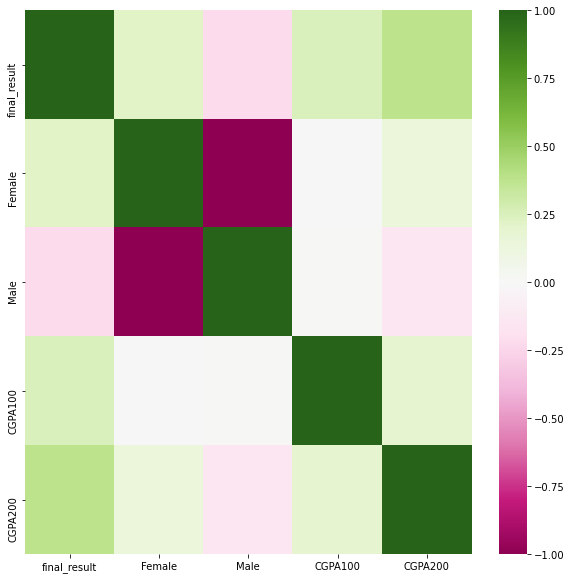

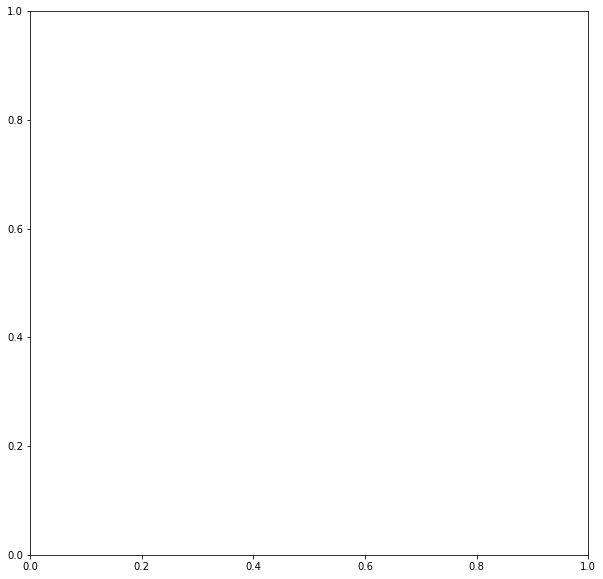

In [31]:
f,ax = plt. subplots(figsize = (10,10))
sns.heatmap(educationdata1_corr, annot = False, cmap="PiYG")
f,ax = plt. subplots(figsize = (10,10))
#sns.heatmap(educationdata2_corr, annot = False, cmap = plt.cm.Purples)

In [32]:
featureMeans = list(educationdata1.columns[1:10])
#featureMeans = list(educationdata2.columns[1:10])

## Importing the datasets for machine learning

In [33]:
x1 = educationdata1.drop("final_result", axis = 1)
y1 = educationdata1.final_result
x2 = educationdata1.drop("final_result", axis = 1)
y2 = educationdata1.final_result
x_train = x1
y_train = y1
x_test = x1
y_test = y1

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## Split the data into their respective parts and run the first algorithm

In [46]:
kNN = KNeighborsClassifier(n_neighbors=10)
DT = DecisionTreeClassifier()
LR = LogisticRegression()

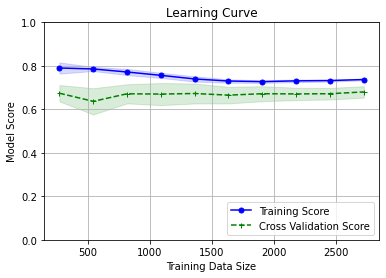

In [42]:
pipeline = make_pipeline(StandardScaler(), kNN)

train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline, X=x_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1,1,10),
                                                     n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Score')
plt.grid()
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

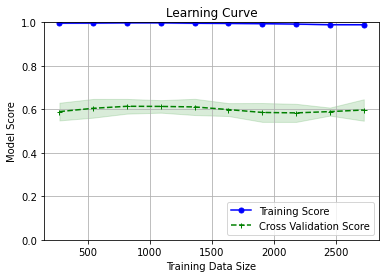

In [47]:
pipeline = make_pipeline(StandardScaler(), DT)

train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline, X=x_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1,1,10),
                                                     n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Score')
plt.grid()
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

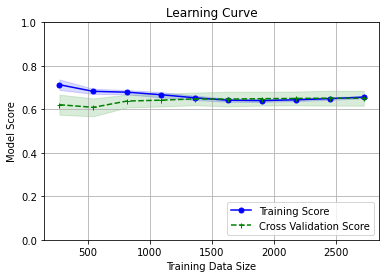

In [48]:
pipeline = make_pipeline(StandardScaler(), LR)

train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline, X=x_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1,1,10),
                                                     n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Score')
plt.grid()
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

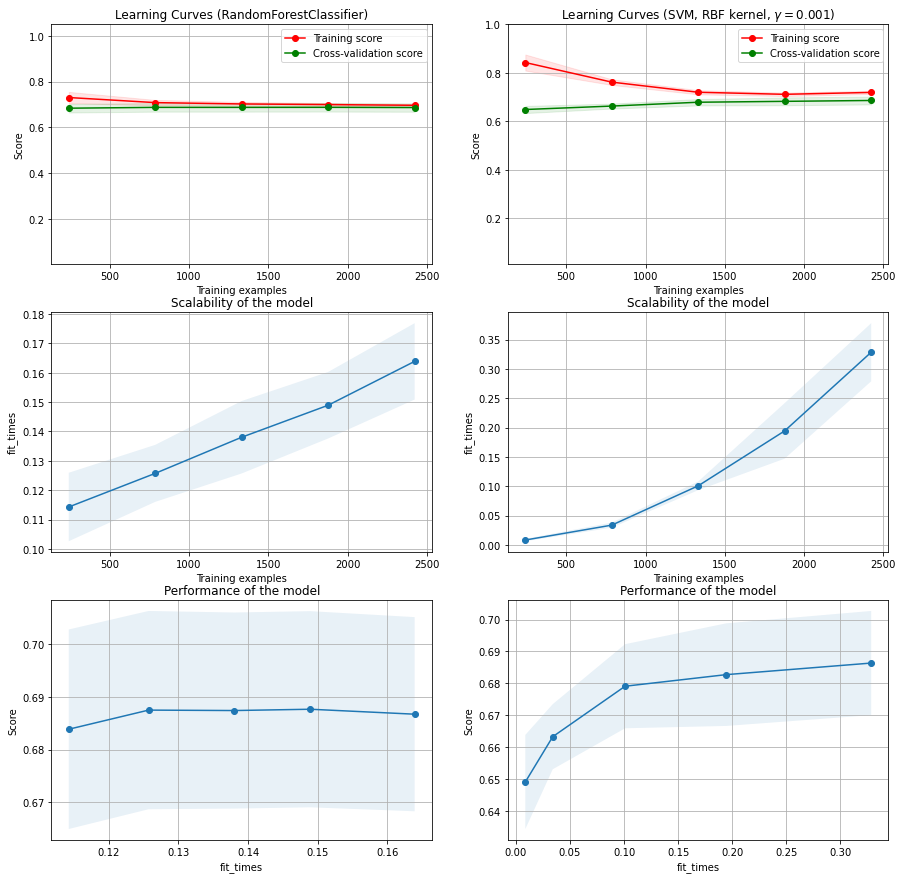

In [38]:
def plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        x_train,
        y_train,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(15, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
plot_learning_curve(
    estimator, title, x_train, y_train, axes=axes[:, 0], ylim=(0.001, 1.05), cv=cv, n_jobs=4
)
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, x_train, y_train, axes=axes[:, 1], ylim=(0.01, 1.0),  n_jobs=4
)

plt.show()